In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.models import load_model

import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os   
import os.path
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

import dlib
import time
 
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

Using TensorFlow backend.


In [2]:
X=[]
Y=[]

Aishee='Canny_HOG/Aishee'
Arkaprabha='Canny_HOG/Arkaprabha'
Rohit='Canny_HOG/Rohit'
Parnavi='Canny_HOG/Parnavi'
Akanksha='Canny_HOG/Akanksha'
Sayan='Canny_HOG/Sayan'
Sukrita='Canny_HOG/Sukrita'
Ritodeep='Canny_HOG/Ritodeep'

In [3]:
def assign_label(img,student_name):
    return student_name

def make_train_data(student_name,DIR):
    for img in tqdm(os.listdir(DIR)):
        label=assign_label(img,student_name)
        path = os.path.join(DIR,img)
        img = cv2.imread(path)
        img = cv2.resize(img, (150,150))
        img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        X.append(np.array(img))
        Y.append(str(label))

In [4]:
make_train_data('Aishee',Aishee)

make_train_data('Arkaprabha',Arkaprabha)

make_train_data('Rohit',Rohit)

make_train_data('Parnavi',Parnavi)

make_train_data('Akanksha',Akanksha)

make_train_data('Sayan',Sayan)

make_train_data('Sukrita',Sukrita)

make_train_data('Ritodeep',Ritodeep)

100%|██████████| 84/84 [00:01<00:00, 76.18it/s] 


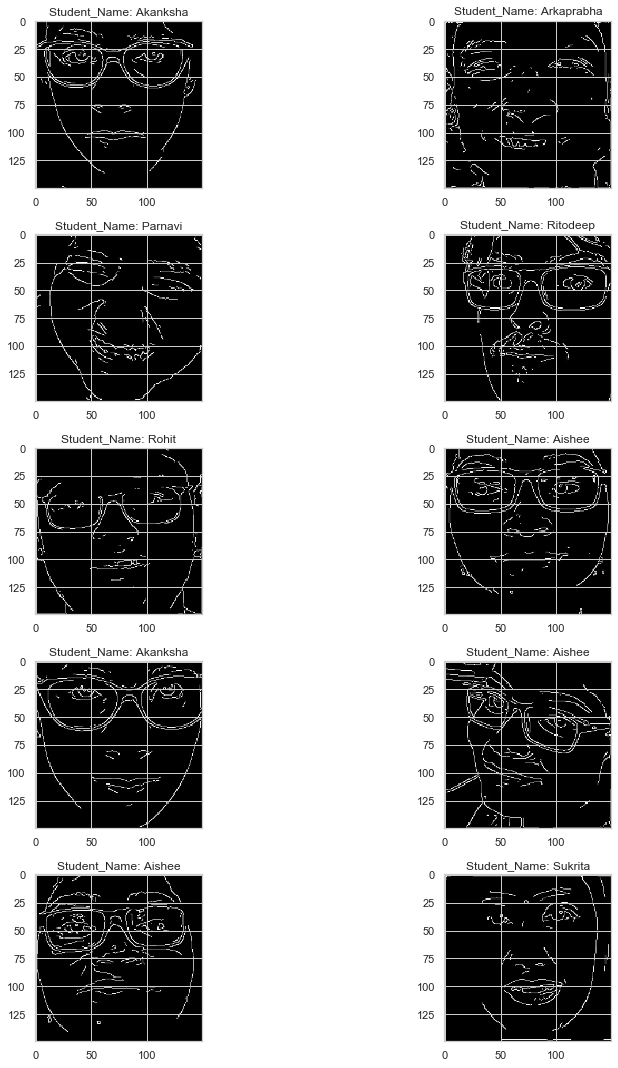

In [5]:
fig,ax=plt.subplots(5,2)
fig.set_size_inches(15,15)
for i in range(5):
    for j in range (2):
        l=rn.randint(0,len(Y))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Student_Name: '+Y[l])
        
plt.tight_layout()

In [6]:
X[l].shape

(150, 150, 3)

In [7]:
le=LabelEncoder()
Y1=le.fit_transform(Y)
Y1=to_categorical(Y1,8)
X=np.array(X)
X=X/255
# X=X[:,:,:,np.newaxis]

x_train1,x_test,y_train1,y_test=train_test_split(X,Y1,test_size=0.1,random_state=42)
x_train,x_val,y_train,y_val=train_test_split(x_train1,y_train1,test_size=0.1,random_state=42)


np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

In [51]:
x_test.shape

(68, 150, 150, 3)

In [8]:
X[l].shape

(150, 150, 3)

In [9]:
# # modelling starts using a CNN.

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(Dropout(0.20))

model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
# model.add(Dropout(0.20))
 
model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
# model.add(Dropout(0.20))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(BatchNormalization())
# model.add(Dropout(0.20))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(8, activation = "softmax"))

In [10]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


# datagen.fit(x_train)

In [11]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 37, 37, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 18, 96)        0         
_________

In [12]:
batch_size=128
epochs=19

hist = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/19
4/4 [==============================] - 22s 5s/step - loss: 3.7999 - acc: 0.2090 - val_loss: 6.3138 - val_acc: 0.2787
Epoch 2/19
4/4 [==============================] - 13s 3s/step - loss: 2.4679 - acc: 0.3368 - val_loss: 7.2581 - val_acc: 0.2295
Epoch 3/19
4/4 [==============================] - 15s 4s/step - loss: 2.3865 - acc: 0.3520 - val_loss: 5.1548 - val_acc: 0.3934
Epoch 4/19
4/4 [==============================] - 13s 3s/step - loss: 1.9372 - acc: 0.4201 - val_loss: 3.6969 - val_acc: 0.4098
Epoch 5/19
4/4 [==============================] - 14s 4s/step - loss: 1.7068 - acc: 0.4866 - val_loss: 4.2054 - val_acc: 0.3770
Epoch 6/19
4/4 [==============================] - 13s 3s/step - loss: 1.4320 - acc: 0.5469 - val_loss: 3.1932 - val_acc: 0.4754
Epoch 7/19
4/4 [==============================] - 12s 3s/step - loss: 1.3709 - acc: 0.5858 - val_loss: 3.1136 - val_acc: 0.4590
Epoch 8/19

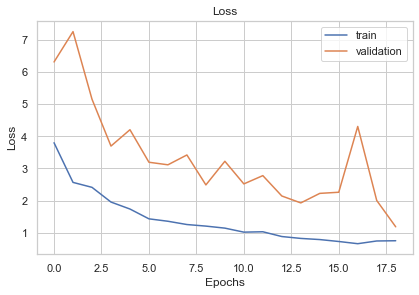

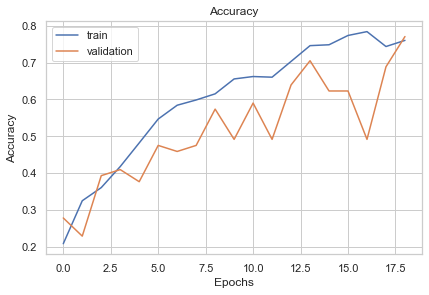

In [13]:
# model.save('gray1.h5')
plt.figure(1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
# plt.ylim([0.0,2.5])

plt.figure(2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
# plt.ylim([0.0,1.0])

In [14]:
pred=model.predict(x_test)
pred_digits=np.argmax(pred,axis=1)

loss_t,accuracy_t=model.evaluate(x_test,y_test)

print(accuracy_t)

68/68 [==============================] - 1s 10ms/step
0.7352941176470589


In [57]:
pred[2]

array([9.9999642e-01, 6.6790662e-10, 1.1454871e-08, 6.7994063e-07,
       2.8589520e-06, 2.1946953e-08, 2.0076599e-12, 2.7739842e-08],
      dtype=float32)

In [15]:
# now storing some properly as well as misclassified indexes'.
i=0
prop_class=[]
mis_class=[]

for i in range(len(y_test)):
    if(np.argmax(y_test[i])==pred_digits[i]):
        prop_class.append(i)
    if(len(prop_class)==8):
        break

i=0
for i in range(len(y_test)):
    if(not np.argmax(y_test[i])==pred_digits[i]):
        mis_class.append(i)
    if(len(mis_class)==8):
        break

In [16]:
y_test.shape

(68, 8)

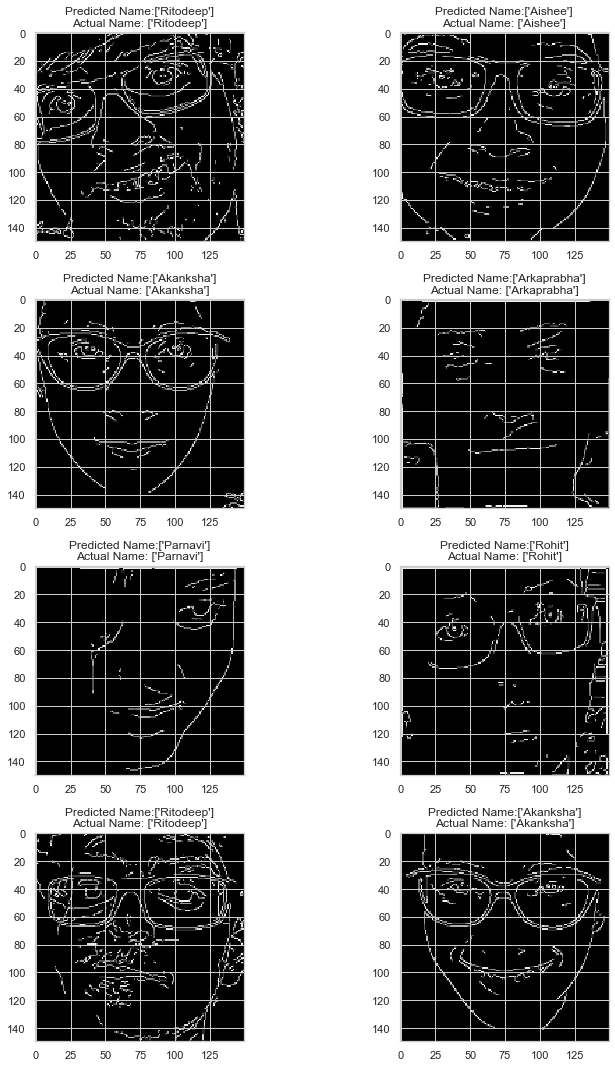

In [17]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[prop_class[count]])
        ax[i,j].set_title("Predicted Name:"+str(le.inverse_transform([pred_digits[prop_class[count]]]))+"\n"+"Actual Name: "+str(le.inverse_transform([np.argmax(y_test[prop_class[count]])])))
        plt.tight_layout()
        count+=1

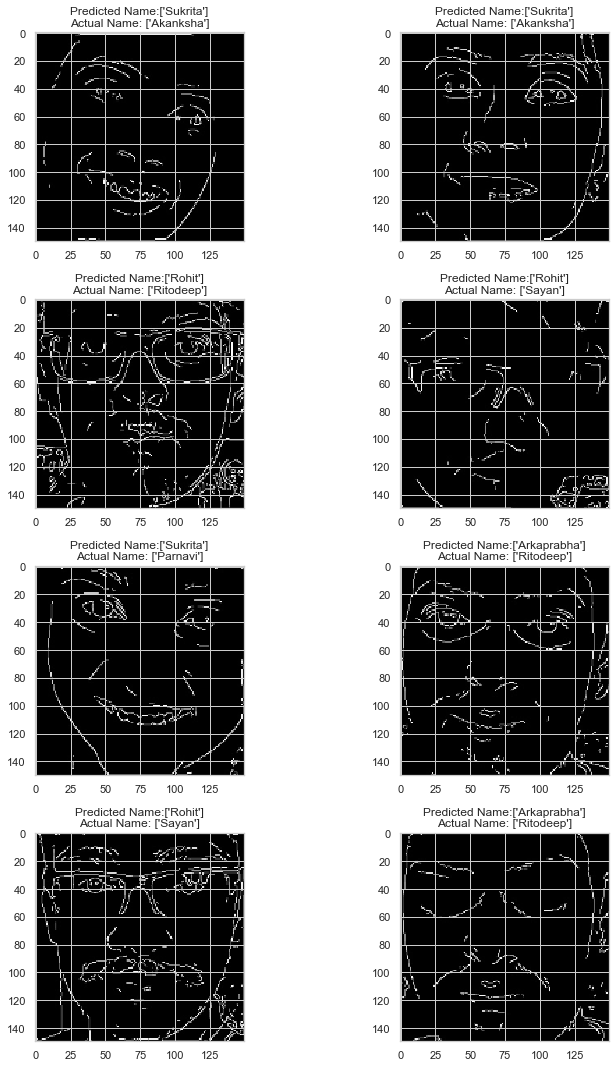

In [18]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

count=0
fig,ax=plt.subplots(4,2)
fig.set_size_inches(15,15)
for i in range (4):
    for j in range (2):
        ax[i,j].imshow(x_test[mis_class[count]])
        ax[i,j].set_title("Predicted Name:"+str(le.inverse_transform([pred_digits[mis_class[count]]]))+"\n"+"Actual Name: "+str(le.inverse_transform([np.argmax(y_test[mis_class[count]])])))
        plt.tight_layout()
        count+=1

In [19]:
from keras.models import model_from_json

if not os.path.exists("models"):
    os.mkdir("models")

# serialize model to JSON
model_json = model.to_json()
with open("models/model_CNN_Canny2.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("models/model_CNN_Canny2_weights.h5")

print("Saved model to disk")

Saved model to disk


In [20]:
# load json and create model
if not os.path.exists("models/model_CNN_Canny2.json"):
    print("Model Not Found!!")

json_file = open('models/model_CNN_Canny2.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

if not os.path.exists("models/model_CNN_Canny2_weights.h5"):
    print("Model Weights Not Found!!")

# load weights into new model
loaded_model.load_weights("models/model_CNN_Canny2_weights.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
loaded_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [22]:
loss_l,accuracy_l=loaded_model.evaluate(x_test,y_test)

print(accuracy_l)

68/68 [==============================] - 1s 15ms/step
0.7352941176470589


In [32]:
import json

weights_list = model.get_weights()
for i in range(0,len(weights_list)):
    weights_list[i] = weights_list[i].tolist()

[[[[0.07779574394226074, -0.06823032349348068, -0.05306578055024147, -0.012000277638435364, 0.0064466590993106365, -0.00331114511936903, -0.07139763236045837, -0.07482576370239258, -0.07214091718196869, 0.0010730091016739607, -0.03549348935484886, -0.07290472835302353, 0.06984178721904755, -0.07970628887414932, -0.03830524906516075, -0.0781145989894867, -0.07219607383012772, -0.058020301163196564, -0.022949829697608948, -0.008863698691129684, -0.009677006863057613, 0.05645594000816345, -0.006695407908409834, 0.07604822516441345, 0.009987288154661655, 0.01398430299013853, 0.02874475158751011, -0.029530616477131844, 0.0010959581704810262, 0.08677647262811661, 0.015498792752623558, -0.01843923144042492], [-0.007959803566336632, -0.033930934965610504, 0.06838251650333405, -0.07172401249408722, 0.06113852933049202, -0.026778269559144974, 0.02199178747832775, 0.031233998015522957, -0.01256144605576992, 0.021128136664628983, 0.031446781009435654, 0.0019479856127873063, 0.02687411569058895, 0.

In [33]:
with open('models/weight_CNN_Canny2.json', 'w') as f:
    json.dump(weights_list, f)

In [35]:
# load json and create model
if not os.path.exists("models/model_CNN_Canny2.json"):
    print("Model Not Found!!")
    
json_file1 = open('models/model_CNN_Canny2.json', 'r')
loaded_model_json1 = json_file1.read()
json_file1.close()
loaded_model1 = model_from_json(loaded_model_json1)

In [39]:
# load weights into new model
# loaded_model1.load_weights("weight_CNN_Canny2.json")
if not os.path.exists("models/weight_CNN_Canny2.json"):
    print("Model Weights Not Found!!")

f = open('models/weight_CNN_Canny2.json')
w = json.load(f)
loaded_model1.set_weights(w)

In [40]:
loaded_model1.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [49]:
loss_l1,accuracy_l1=loaded_model1.evaluate(x_test,y_test)

print(accuracy_l1)

68/68 [==============================] - 1s 10ms/step
0.7352941176470589


In [46]:
wl1 = loaded_model1.get_weights()
wl1

[array([[[[ 7.77957439e-02, -6.82303235e-02, -5.30657806e-02, ...,
            8.67764726e-02,  1.54987928e-02, -1.84392314e-02],
          [-7.95980357e-03, -3.39309350e-02,  6.83825165e-02, ...,
            5.26897348e-02, -9.44204256e-02,  5.93634844e-02],
          [ 6.11950569e-02, -7.09112138e-02,  8.40440243e-02, ...,
            7.63342008e-02, -3.40030529e-02,  8.40997249e-02]],
 
         [[ 1.59753226e-02, -4.42757495e-02,  2.10753717e-02, ...,
            7.23498967e-03, -4.44087498e-02, -4.62628491e-02],
          [-4.11783494e-02, -5.00047766e-02,  4.84981909e-02, ...,
           -3.34553272e-02,  3.94584797e-02, -1.00117940e-02],
          [-4.98997327e-03,  2.64529269e-02, -1.97956003e-02, ...,
           -3.40244398e-02, -7.36008883e-02,  8.31822380e-02]],
 
         [[ 5.83412722e-02,  6.96214363e-02, -1.75062660e-02, ...,
           -6.93082735e-02, -5.93798608e-02, -5.43074943e-02],
          [ 3.06463968e-02, -3.45197469e-02, -6.20821305e-02, ...,
            2.615

In [48]:
w1 = model.get_weights()
w1

[array([[[[ 7.77957439e-02, -6.82303235e-02, -5.30657806e-02, ...,
            8.67764726e-02,  1.54987928e-02, -1.84392314e-02],
          [-7.95980357e-03, -3.39309350e-02,  6.83825165e-02, ...,
            5.26897348e-02, -9.44204256e-02,  5.93634844e-02],
          [ 6.11950569e-02, -7.09112138e-02,  8.40440243e-02, ...,
            7.63342008e-02, -3.40030529e-02,  8.40997249e-02]],
 
         [[ 1.59753226e-02, -4.42757495e-02,  2.10753717e-02, ...,
            7.23498967e-03, -4.44087498e-02, -4.62628491e-02],
          [-4.11783494e-02, -5.00047766e-02,  4.84981909e-02, ...,
           -3.34553272e-02,  3.94584797e-02, -1.00117940e-02],
          [-4.98997327e-03,  2.64529269e-02, -1.97956003e-02, ...,
           -3.40244398e-02, -7.36008883e-02,  8.31822380e-02]],
 
         [[ 5.83412722e-02,  6.96214363e-02, -1.75062660e-02, ...,
           -6.93082735e-02, -5.93798608e-02, -5.43074943e-02],
          [ 3.06463968e-02, -3.45197469e-02, -6.20821305e-02, ...,
            2.615